In [19]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap
import matplotlib.pyplot as plt

In [2]:
# SHAP doesn't play nice with tensorflow 2.0
import tensorflow
from tensorflow.compat.v1.keras.backend import get_session

tensorflow.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return get_session().run(model.layers[layer].input, feed_dict)

In [47]:
img = X[[41]].reshape((224,224,3))
# plt.imshow(img[:,:,0])
# type(X)

model.layers[0].input[2]

<tf.Tensor 'strided_slice_26:0' shape=(224, 224, 3) dtype=float32>

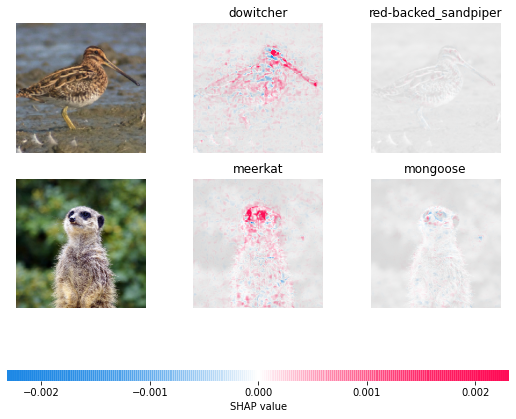

In [13]:
# Magic starts here. Layer number is important. Must be convolution layer

l = 4

e = shap.GradientExplainer((model.layers[l].input, model.layers[-1].output),
    map2layer(X, l),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, l), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

In [5]:
def print_model_properties(model, indices = 0):
    for i, layer in enumerate(model.layers[indices:]):
        print(i+indices, layer.name,layer.trainable)
print_model_properties(model)

0 input_2 False
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 fc1 True
21 fc2 True
22 predictions True
